In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import tensorflow as tf
from sklearn.metrics import r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, GRU, Conv1D, MaxPooling1D, Flatten, Dropout

Load your dataset

In [147]:
data = pd.read_csv("3w1.csv")

Features and Target variables

In [148]:
features = data[['CF(PCU/min)','CF*2(PCU/min)','%_of_2W','%_of_3W','%_of_4W']].values
target = data['SD'].values

Normalize data

In [149]:
scaler = MinMaxScaler()
features = scaler.fit_transform(features)

Split data into train and test sets

In [150]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

Reshape the input data for all models

In [151]:
X_train_lstm = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

Define, Create and Evaluate Model

In [175]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    # model.add(Dropout(0.2))
    model.add(LSTM(48, activation='relu', return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

lstm_model = create_lstm_model()
lstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=16, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_lstm = lstm_model.predict(X_test_lstm)
mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

Epoch 1/800
29/29 [==============================] - 2s 13ms/step - loss: 260.9269 - val_loss: 263.0035
Epoch 2/800
29/29 [==============================] - 0s 4ms/step - loss: 96.9011 - val_loss: 45.4421
Epoch 3/800
29/29 [==============================] - 0s 4ms/step - loss: 35.5972 - val_loss: 31.1872
Epoch 4/800
29/29 [==============================] - 0s 4ms/step - loss: 33.0215 - val_loss: 30.7209
Epoch 5/800
29/29 [==============================] - 0s 4ms/step - loss: 33.8008 - val_loss: 37.8080
Epoch 6/800
29/29 [==============================] - 0s 4ms/step - loss: 33.6057 - val_loss: 30.4766
Epoch 7/800
29/29 [==============================] - 0s 4ms/step - loss: 32.7732 - val_loss: 31.4202
Epoch 8/800
29/29 [==============================] - 0s 4ms/step - loss: 32.5257 - val_loss: 30.0927
Epoch 9/800
29/29 [==============================] - 0s 4ms/step - loss: 33.9359 - val_loss: 30.5305
Epoch 10/800
29/29 [==============================] - 0s 4ms/step - loss: 32.6612 - val_

Visualize LSTM results

0.4737981864029698


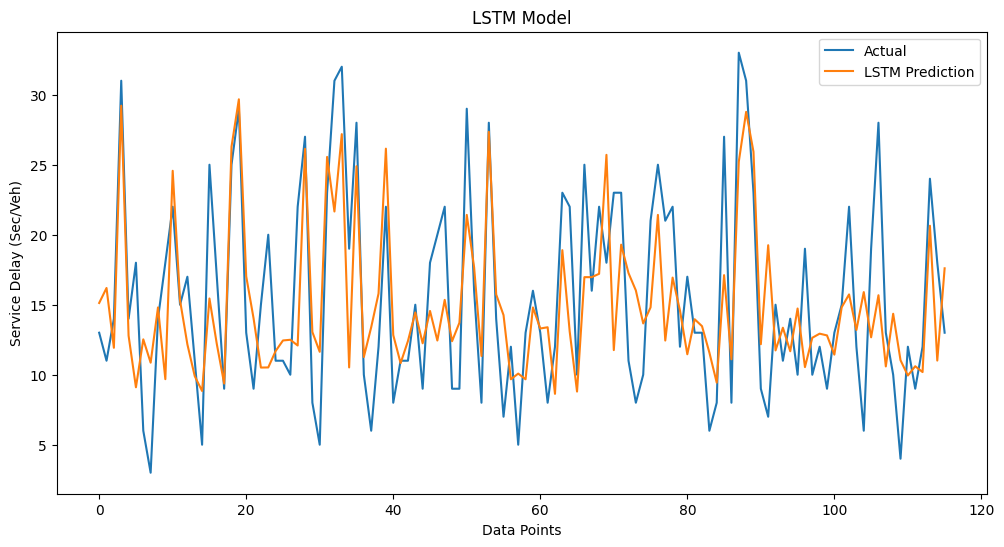

In [176]:
print(r2_lstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_lstm, label='LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('LSTM Model')
plt.show()

In [185]:
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(LSTM(64, activation='relu', return_sequences=False)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bilstm_model = create_bilstm_model()
bilstm_model.fit(X_train_lstm, y_train, epochs=800, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bilstm = bilstm_model.predict(X_test_lstm)
mae_bilstm = mean_absolute_error(y_test, y_pred_bilstm)
mse_bilstm = mean_squared_error(y_test, y_pred_bilstm)
rmse_bilstm=np.sqrt(mse_bilstm)
r2_bilstm = r2_score(y_test, y_pred_bilstm)


Epoch 1/800
15/15 [==============================] - 3s 30ms/step - loss: 264.9307 - val_loss: 281.6647
Epoch 2/800
15/15 [==============================] - 0s 6ms/step - loss: 230.2524 - val_loss: 139.5534
Epoch 3/800
15/15 [==============================] - 0s 6ms/step - loss: 51.3739 - val_loss: 33.1538
Epoch 4/800
15/15 [==============================] - 0s 6ms/step - loss: 33.5559 - val_loss: 36.0970
Epoch 5/800
15/15 [==============================] - 0s 7ms/step - loss: 33.5158 - val_loss: 31.6580
Epoch 6/800
15/15 [==============================] - 0s 7ms/step - loss: 32.9310 - val_loss: 36.7992
Epoch 7/800
15/15 [==============================] - 0s 8ms/step - loss: 36.6455 - val_loss: 31.2760
Epoch 8/800
15/15 [==============================] - 0s 6ms/step - loss: 33.6639 - val_loss: 30.8830
Epoch 9/800
15/15 [==============================] - 0s 7ms/step - loss: 33.6189 - val_loss: 30.8133
Epoch 10/800
15/15 [==============================] - 0s 7ms/step - loss: 32.9960 - va

Visualize BiLSTM results

0.46262353254180366


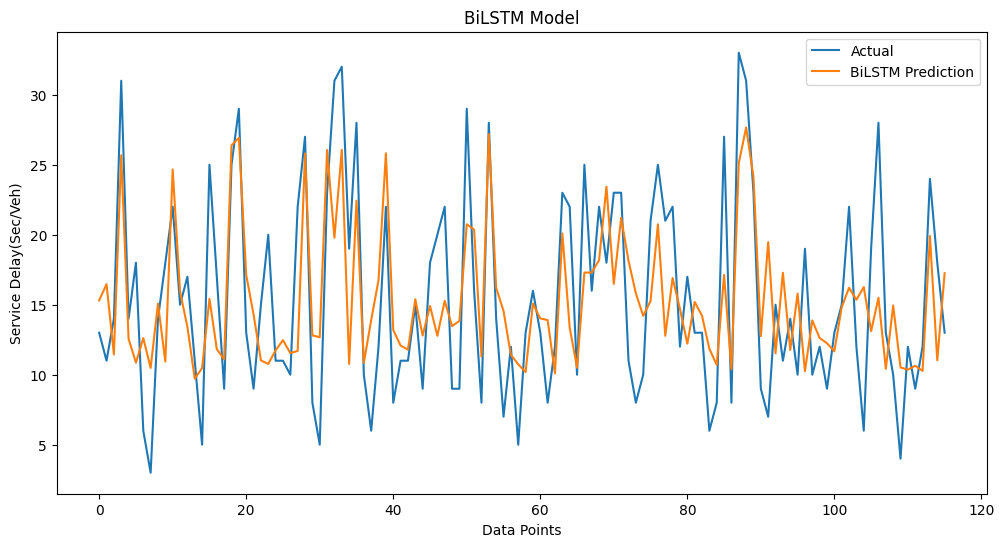

In [184]:
print(r2_bilstm)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bilstm, label='BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay(Sec/Veh)')
plt.legend()
plt.title('BiLSTM Model')
plt.show()

In [156]:
def create_gru_model():
    model = Sequential()
    model.add(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True))
    model.add(GRU(48, activation='relu', return_sequences=False))  
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

gru_model = create_gru_model()
gru_model.fit(X_train_lstm, y_train, epochs=192, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_gru = gru_model.predict(X_test_lstm)
mae_gru = mean_absolute_error(y_test, y_pred_gru)
mse_gru = mean_squared_error(y_test, y_pred_gru)
rmse_gru=np.sqrt(mse_gru)
r2_gru = r2_score(y_test, y_pred_gru)

Epoch 1/192
15/15 [==============================] - 2s 24ms/step - loss: 264.8430 - val_loss: 283.3878
Epoch 2/192
15/15 [==============================] - 0s 6ms/step - loss: 246.1263 - val_loss: 237.2095
Epoch 3/192
15/15 [==============================] - 0s 6ms/step - loss: 121.8885 - val_loss: 65.7981
Epoch 4/192
15/15 [==============================] - 0s 6ms/step - loss: 46.4150 - val_loss: 43.4594
Epoch 5/192
15/15 [==============================] - 0s 5ms/step - loss: 38.4085 - val_loss: 40.0023
Epoch 6/192
15/15 [==============================] - 0s 5ms/step - loss: 36.6973 - val_loss: 36.3835
Epoch 7/192
15/15 [==============================] - 0s 5ms/step - loss: 35.4295 - val_loss: 37.1815
Epoch 8/192
15/15 [==============================] - 0s 6ms/step - loss: 37.5917 - val_loss: 34.8211
Epoch 9/192
15/15 [==============================] - 0s 6ms/step - loss: 36.2102 - val_loss: 35.6482
Epoch 10/192
15/15 [==============================] - 0s 6ms/step - loss: 34.7870 - v

Visualize GRU results

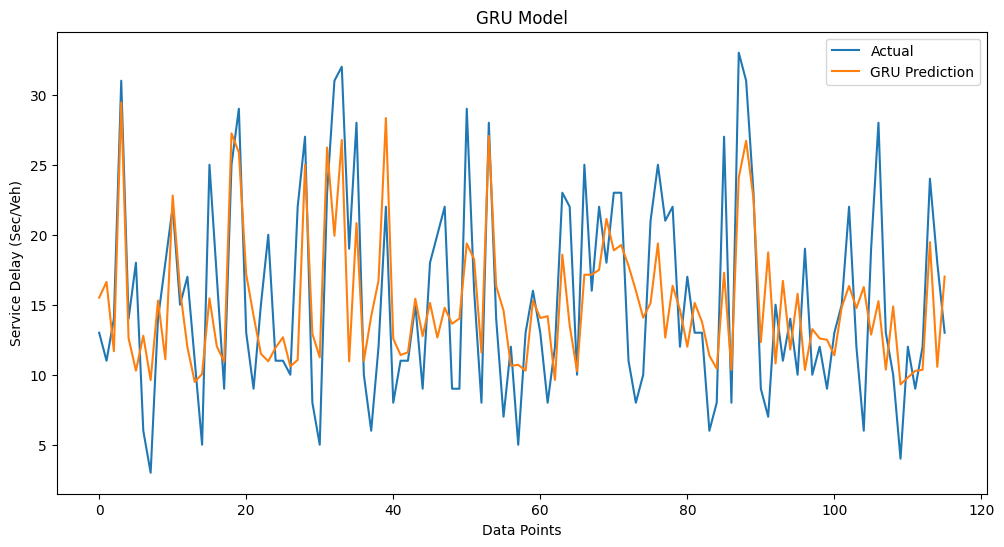

In [157]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_gru, label='GRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('GRU Model')
plt.show()

In [158]:
def create_bigru_model():
    model = Sequential()
    model.add(Bidirectional(GRU(128, activation='relu', input_shape=(X_train_lstm.shape[1], 1), return_sequences=True)))
    model.add(Bidirectional(GRU(48, activation='relu', return_sequences=False))) 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

bigru_model = create_bigru_model()
bigru_model.fit(X_train_lstm, y_train, epochs=192, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_bigru = bigru_model.predict(X_test_lstm)
mae_bigru = mean_absolute_error(y_test, y_pred_bigru)
mse_bigru = mean_squared_error(y_test, y_pred_bigru)
rmse_bigru=np.sqrt(mse_bigru)
r2_bigru = r2_score(y_test, y_pred_bigru)

Epoch 1/192
15/15 [==============================] - 4s 46ms/step - loss: 255.8914 - val_loss: 255.6331
Epoch 2/192
15/15 [==============================] - 0s 8ms/step - loss: 167.7626 - val_loss: 44.0229
Epoch 3/192
15/15 [==============================] - 0s 8ms/step - loss: 51.0326 - val_loss: 50.3519
Epoch 4/192
15/15 [==============================] - 0s 8ms/step - loss: 42.1512 - val_loss: 45.0701
Epoch 5/192
15/15 [==============================] - 0s 8ms/step - loss: 41.4233 - val_loss: 40.2361
Epoch 6/192
15/15 [==============================] - 0s 8ms/step - loss: 39.2438 - val_loss: 38.7728
Epoch 7/192
15/15 [==============================] - 0s 7ms/step - loss: 37.1042 - val_loss: 37.9600
Epoch 8/192
15/15 [==============================] - 0s 7ms/step - loss: 35.9390 - val_loss: 35.2279
Epoch 9/192
15/15 [==============================] - 0s 7ms/step - loss: 34.5381 - val_loss: 35.6899
Epoch 10/192
15/15 [==============================] - 0s 7ms/step - loss: 33.3058 - val

Visualize BiGRU results

0.4651820862391005


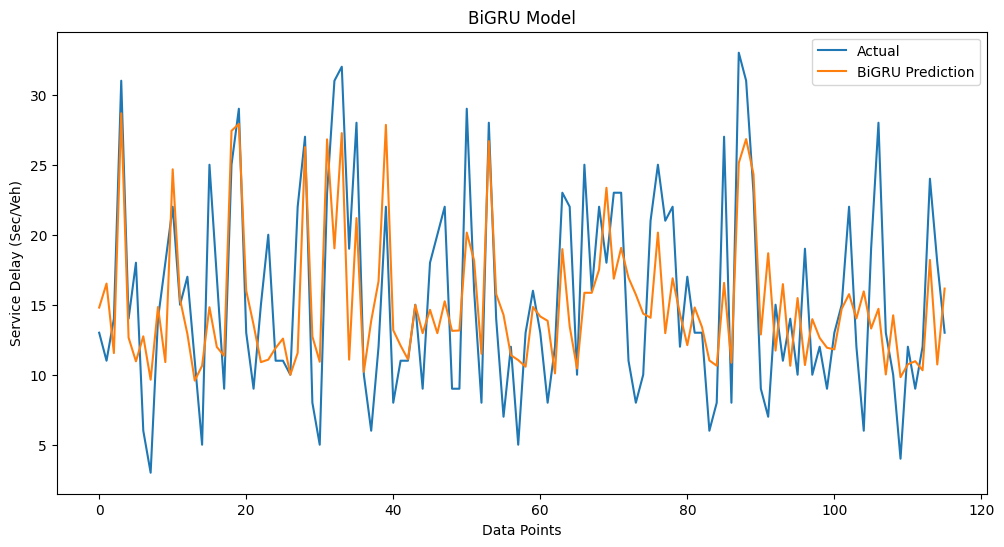

In [159]:
print(r2_bigru)
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_bigru, label='BiGRU Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('BiGRU Model')
plt.show()

In [160]:
def create_cnn_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_model = create_cnn_model()
cnn_model.fit(X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), y_train, epochs=300, batch_size=64, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

y_pred_cnn = cnn_model.predict(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)))
mae_cnn = mean_absolute_error(y_test, y_pred_cnn)
mse_cnn = mean_squared_error(y_test, y_pred_cnn)
rmse_cnn=np.sqrt(mse_cnn)
r2_cnn = r2_score(y_test, y_pred_cnn)

Epoch 1/300
8/8 [==============================] - 0s 17ms/step - loss: 262.3600 - val_loss: 276.4100
Epoch 2/300
8/8 [==============================] - 0s 5ms/step - loss: 244.1128 - val_loss: 251.1449
Epoch 3/300
8/8 [==============================] - 0s 5ms/step - loss: 216.0808 - val_loss: 212.1283
Epoch 4/300
8/8 [==============================] - 0s 5ms/step - loss: 172.8360 - val_loss: 159.4930
Epoch 5/300
8/8 [==============================] - 0s 5ms/step - loss: 120.2485 - val_loss: 100.0075
Epoch 6/300
8/8 [==============================] - 0s 5ms/step - loss: 70.8086 - val_loss: 54.4625
Epoch 7/300
8/8 [==============================] - 0s 5ms/step - loss: 41.9400 - val_loss: 42.9165
Epoch 8/300
8/8 [==============================] - 0s 5ms/step - loss: 42.9361 - val_loss: 44.3941
Epoch 9/300
8/8 [==============================] - 0s 5ms/step - loss: 42.5345 - val_loss: 42.1685
Epoch 10/300
8/8 [==============================] - 0s 5ms/step - loss: 39.6180 - val_loss: 42.820

Visualize CNN results

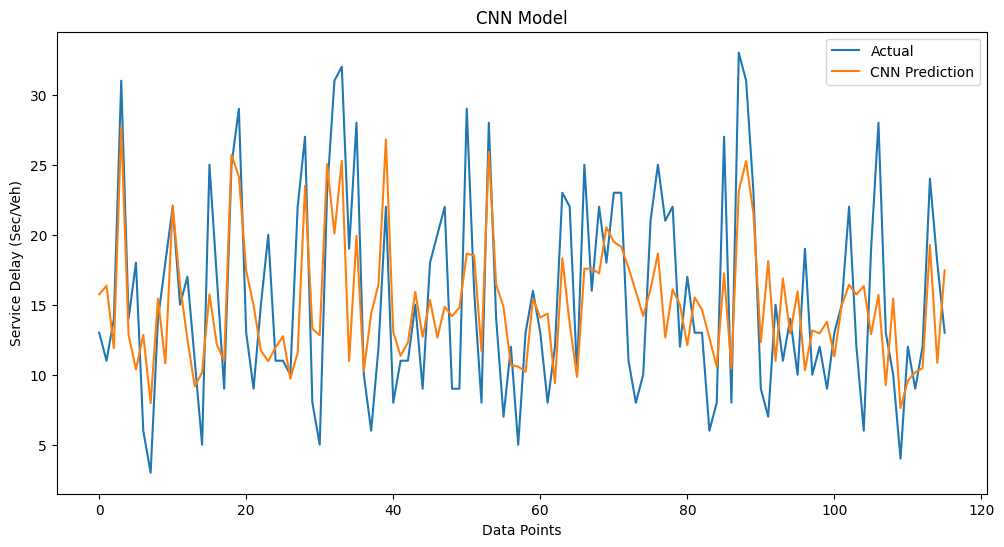

In [161]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn, label='CNN Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN Model')
plt.show()

In [162]:
def create_cnn_lstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_lstm_model = create_cnn_lstm_model()
cnn_lstm_model.fit(X_train_lstm, y_train, epochs=300, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_lstm = cnn_lstm_model.predict(X_test_lstm)
mae_cnn_lstm = mean_absolute_error(y_test, y_pred_cnn_lstm)
mse_cnn_lstm = mean_squared_error(y_test, y_pred_cnn_lstm)
rmse_cnn_lstm=np.sqrt(mse_cnn_lstm)
r2_cnn_lstm = r2_score(y_test, y_pred_cnn_lstm)

Epoch 1/300
15/15 [==============================] - 1s 14ms/step - loss: 264.0963 - val_loss: 281.7600
Epoch 2/300
15/15 [==============================] - 0s 4ms/step - loss: 245.3285 - val_loss: 239.5726
Epoch 3/300
15/15 [==============================] - 0s 4ms/step - loss: 141.2385 - val_loss: 33.1297
Epoch 4/300
15/15 [==============================] - 0s 3ms/step - loss: 43.6142 - val_loss: 46.6681
Epoch 5/300
15/15 [==============================] - 0s 4ms/step - loss: 37.0122 - val_loss: 32.1474
Epoch 6/300
15/15 [==============================] - 0s 4ms/step - loss: 34.6774 - val_loss: 32.7058
Epoch 7/300
15/15 [==============================] - 0s 4ms/step - loss: 35.8771 - val_loss: 34.7130
Epoch 8/300
15/15 [==============================] - 0s 4ms/step - loss: 34.4018 - val_loss: 33.5265
Epoch 9/300
15/15 [==============================] - 0s 5ms/step - loss: 34.3261 - val_loss: 32.0405
Epoch 10/300
15/15 [==============================] - 0s 4ms/step - loss: 34.6440 - v

Visualize CNN_LSTM results

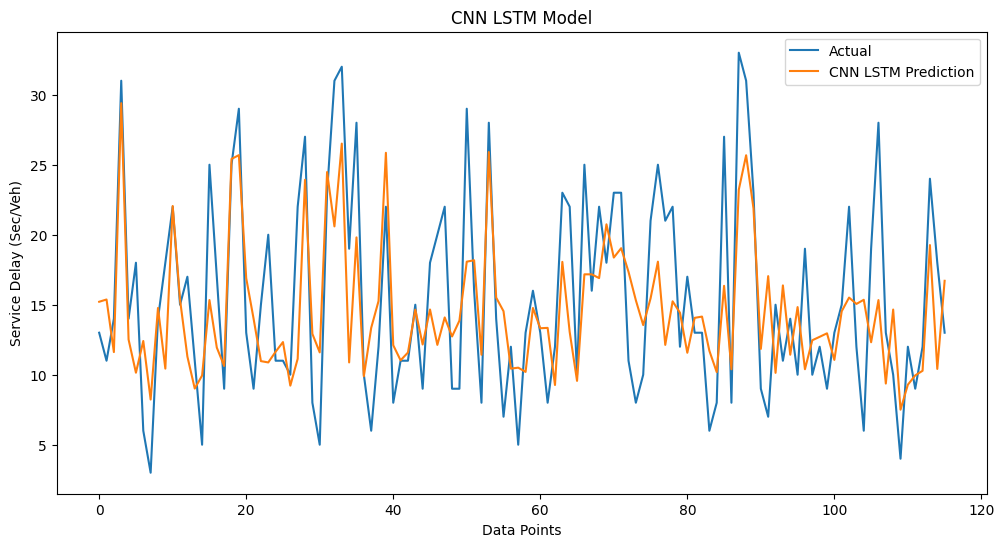

In [163]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_lstm, label='CNN LSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN LSTM Model')
plt.show()

In [164]:
def create_cnn_bilstm_model():
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=2, activation='relu', input_shape=(X_train_lstm.shape[1], 1)))
    model.add(MaxPooling1D(pool_size=1))
    model.add(Bidirectional(LSTM(50, activation='relu')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

cnn_bilstm_model = create_cnn_bilstm_model()
cnn_bilstm_model.fit(X_train_lstm, y_train, epochs=300, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

y_pred_cnn_bilstm = cnn_bilstm_model.predict(X_test_lstm)
mae_cnn_bilstm = mean_absolute_error(y_test, y_pred_cnn_bilstm)
mse_cnn_bilstm = mean_squared_error(y_test, y_pred_cnn_bilstm)
rmse_cnn_bilstm=np.sqrt(mse_cnn_bilstm)
r2_cnn_bilstm = r2_score(y_test, y_pred_cnn_bilstm)

Epoch 1/300
15/15 [==============================] - 2s 18ms/step - loss: 264.1187 - val_loss: 281.9039
Epoch 2/300
15/15 [==============================] - 0s 5ms/step - loss: 245.2946 - val_loss: 239.0061
Epoch 3/300
15/15 [==============================] - 0s 5ms/step - loss: 147.1666 - val_loss: 35.6064
Epoch 4/300
15/15 [==============================] - 0s 5ms/step - loss: 44.6876 - val_loss: 48.0935
Epoch 5/300
15/15 [==============================] - 0s 4ms/step - loss: 36.9153 - val_loss: 34.6792
Epoch 6/300
15/15 [==============================] - 0s 4ms/step - loss: 34.4566 - val_loss: 35.8457
Epoch 7/300
15/15 [==============================] - 0s 6ms/step - loss: 34.6208 - val_loss: 36.8909
Epoch 8/300
15/15 [==============================] - 0s 4ms/step - loss: 34.5269 - val_loss: 33.4364
Epoch 9/300
15/15 [==============================] - 0s 4ms/step - loss: 34.5692 - val_loss: 33.9423
Epoch 10/300
15/15 [==============================] - 0s 4ms/step - loss: 33.5603 - v

Visualize CNN_BiLSTM results

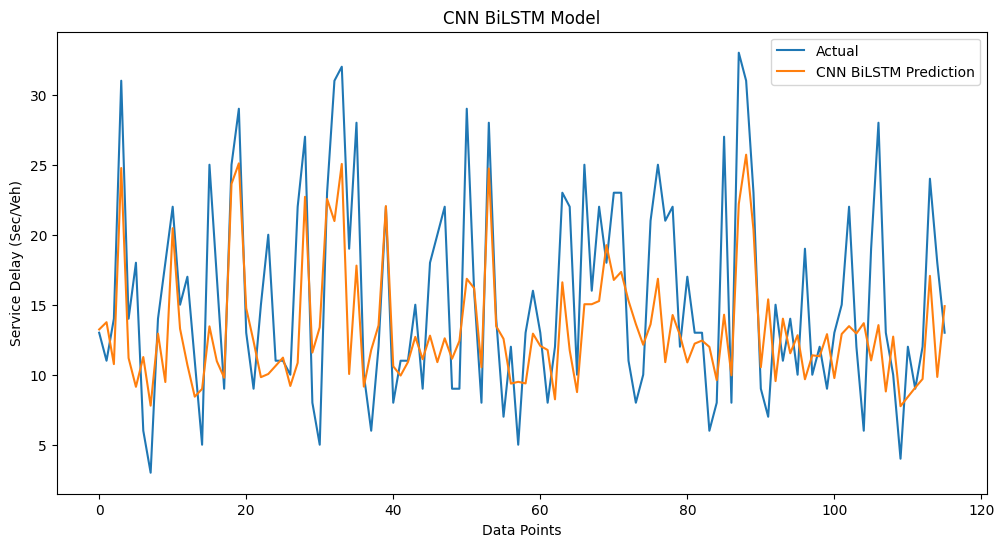

In [165]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_cnn_bilstm, label='CNN BiLSTM Prediction')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec/Veh)')
plt.legend()
plt.title('CNN BiLSTM Model')
plt.show()

Visualize metrics

In [166]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

Plot MAE

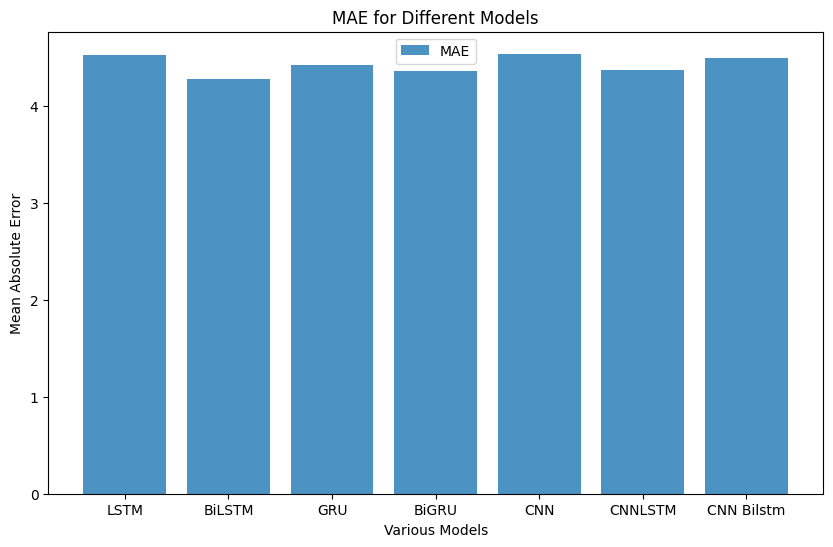

In [167]:
plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, alpha=0.8, label='MAE')
plt.title('MAE for Different Models')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Various Models')
plt.legend()
plt.show()

Plot MSE

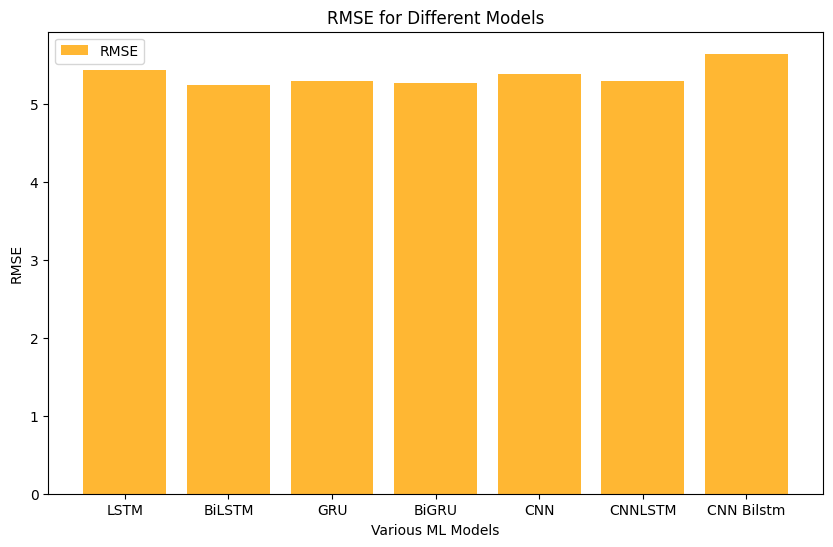

In [168]:
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, alpha=0.8, label='RMSE', color='orange')
plt.title('RMSE for Different Models')
plt.ylabel('RMSE')
plt.xlabel('Various ML Models')
plt.legend()
plt.show()

Plot R2 Score

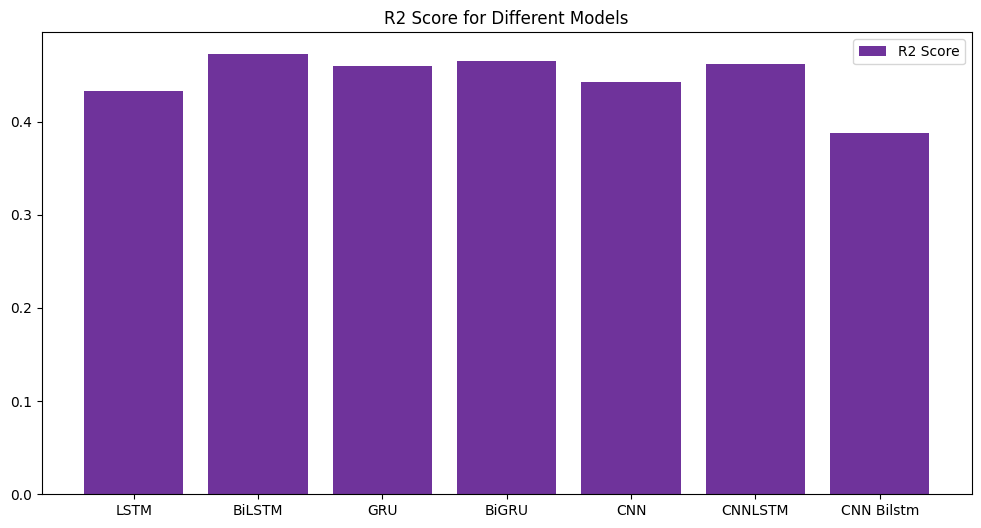

In [169]:
plt.figure(figsize=(12, 6))
plt.bar(models, r2_values, alpha=0.8, label='R2 Score', color='indigo')
plt.title('R2 Score for Different Models')
plt.legend()
plt.show()

Print Metrics

In [170]:
print("LSTM MAE:", mae_lstm)
print("LSTM MSE:", rmse_lstm)
print("LSTM R2 Score:", r2_lstm)
print(end="\n")
print("BiLSTM MAE:", mae_bilstm)
print("BiLSTM MSE:", rmse_bilstm)
print("BiLSTM R2 Score:", r2_bilstm)
print(end="\n")
print("GRU MAE:", mae_gru)
print("GRU MSE:", rmse_gru)
print("GRU R2 Score:", r2_gru)
print(end="\n")
print("BiGRU MAE:", mae_bigru)
print("BiGRU MSE:", rmse_bigru)
print("BiGRU R2 Score:", r2_bigru)
print(end="\n")
print("CNN MAE:", mae_cnn)
print("CNN MSE:", rmse_cnn)
print("CNN R2 Score:", r2_cnn)
print(end="\n")
print("CNN LSTM MAE:", mae_cnn_lstm)
print("CNN LSTM MSE:", rmse_cnn_lstm)
print("CNN LSTM R2 Score:", r2_cnn_lstm)
print(end="\n")
print("CNN BiLSTM MAE:", mae_cnn_bilstm)
print("CNN BiLSTM MSE:", rmse_cnn_bilstm)
print("CNN BiLSTM R2 Score:", r2_cnn_bilstm)

LSTM MAE: 4.53003426255851
LSTM MSE: 5.428534789471933
LSTM R2 Score: 0.43243452255165504

BiLSTM MAE: 4.285756004267726
BiLSTM MSE: 5.235083229203887
BiLSTM R2 Score: 0.472165343346318

GRU MAE: 4.429319825665704
GRU MSE: 5.296330333991486
GRU R2 Score: 0.459742444410019

BiGRU MAE: 4.365778659952098
BiGRU MSE: 5.26959953991843
BiGRU R2 Score: 0.4651820862391005

CNN MAE: 4.543336596982233
CNN MSE: 5.381854166343346
CNN R2 Score: 0.4421536815136641

CNN LSTM MAE: 4.371470447244315
CNN LSTM MSE: 5.285332208345976
CNN LSTM R2 Score: 0.4619838647301363

CNN BiLSTM MAE: 4.501467232046457
CNN BiLSTM MSE: 5.639802076052689
CNN BiLSTM R2 Score: 0.3873979487818223


Plot predictions for each model

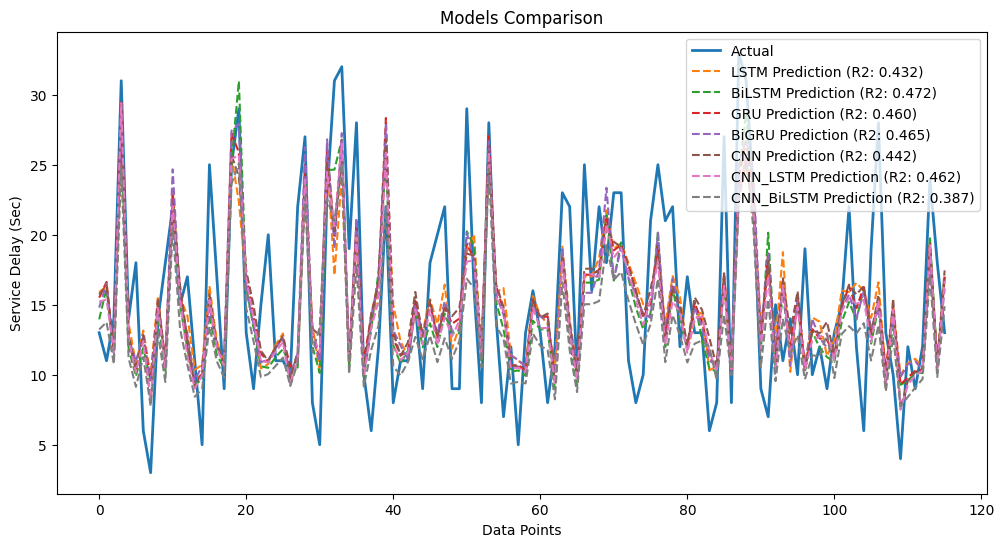

In [171]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', linewidth=2)
plt.plot(y_pred_lstm, label=f'LSTM Prediction (R2: {r2_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_bilstm, label=f'BiLSTM Prediction (R2: {r2_bilstm:.3f})', linestyle='dashed')
plt.plot(y_pred_gru, label=f'GRU Prediction (R2: {r2_gru:.3f})', linestyle='dashed')
plt.plot(y_pred_bigru, label=f'BiGRU Prediction (R2: {r2_bigru:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn, label=f'CNN Prediction (R2: {r2_cnn:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_lstm, label=f'CNN_LSTM Prediction (R2: {r2_cnn_lstm:.3f})', linestyle='dashed')
plt.plot(y_pred_cnn_bilstm, label=f'CNN_BiLSTM Prediction (R2: {r2_cnn_bilstm:.3f})', linestyle='dashed')
plt.xlabel('Data Points')
plt.ylabel('Service Delay (Sec)')
plt.legend()
plt.title('Models Comparison')
plt.show()

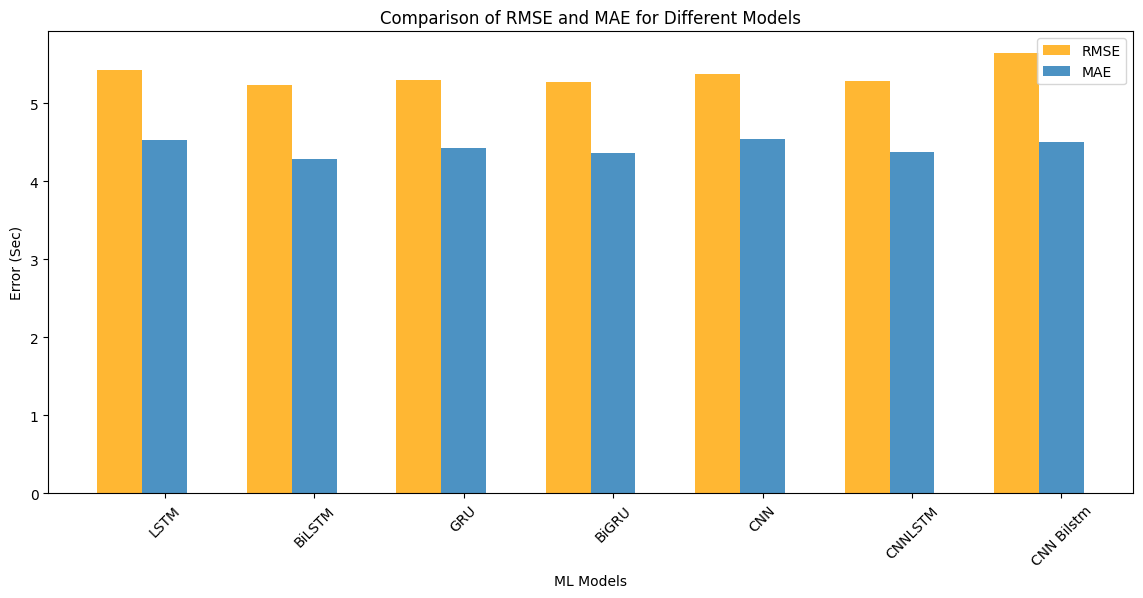

In [172]:
models = ['LSTM', 'BiLSTM', 'GRU', 'BiGRU', 'CNN', 'CNNLSTM', 'CNN Bilstm']
mae_values = [mae_lstm, mae_bilstm, mae_gru, mae_bigru, mae_cnn, mae_cnn_lstm, mae_cnn_bilstm]
mse_values = [rmse_lstm, rmse_bilstm, rmse_gru, rmse_bigru, rmse_cnn, rmse_cnn_lstm, rmse_cnn_bilstm]
r2_values = [r2_lstm, r2_bilstm, r2_gru, r2_bigru, r2_cnn, r2_cnn_lstm, r2_cnn_bilstm]

bar_width = 0.3
index = np.arange(len(models))

plt.figure(figsize=(14, 6))

# Plot MSE
plt.bar(index, mse_values, width=bar_width, alpha=0.8, label='RMSE', color='orange')

# Plot MAE
plt.bar(index + bar_width, mae_values, width=bar_width, alpha=0.8, label='MAE')

# Plot R2
#plt.bar(index + 2*bar_width, r2_values, width=bar_width, alpha=0.8, label='R2')

plt.xlabel('ML Models')
plt.ylabel('Error (Sec)')
plt.title('Comparison of RMSE and MAE for Different Models')
plt.xticks(index + bar_width, models, rotation=45)
plt.legend()

plt.show()